# Extract npz files and generate plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from FlexibleWM import *

import time
from datetime import datetime
import ipdb


In [2]:
# Start the timer
start_time = time.time()

# Set the current time as 'name_simu' (e.g., formatted as Year-Month-Day_Hour-Minute-Second)
time_simu = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
print(f"Simulation start time: {time_simu}")

# sim_name = 'trials/{time_simu}'
sim_name = 'FindTuningCurve'

folder_path = f'./FlexibleWM/{sim_name}'

dictionnary={
    'name_simu':f'FlexibleWM/{sim_name}',
    'Number_of_trials':1,
    'specific_load':True,
    'value_of_specific_load':2,  # number of items to remember. The specific location is random
    'compute_tuning_curve':False, # Reuse tuning curve
    'same_network_to_use':True,
    # 'create_a_specific_network':True

    } # Add here any parameter you want to change from default. Defaults values are at the beginning of FlexibleWM.py
MyModel = FlexibleWM(dictionnary)
psth = MyModel.find_tuning_curve()
gcPython.collect() 

# End the timer
end_time = time.time()

# Calculate the total running time
total_time = end_time - start_time
print(f"Total running time: {total_time:.2f} seconds")

Simulation start time: 2024-09-24_21-00-50
Initializing the weights of the network that will be used for all trials 
 


INFO:root:creating /var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_lctwqdt8/var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_lctwqdt8
INFO:root:arm64-apple-darwin20.0.0-clang++ -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -stdlib=libc++ -fvisibility-inlines-hidden -fmessage-length=0 -isystem /Users/derek/anaconda3/envs/py39/include -D_FORTIFY_SOURCE=2 -isystem /Users/derek/anaconda3/envs/py39/include -c /var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_lctwqdt8/flag_test.cpp -o /var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_lctwqdt8/var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_lctwqdt8/flag_test.o -w
INFO:root:creating /var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_zh1nn_u7/var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_zh1nn_u7
INFO:root:arm64-apple-darwin20.0.0-clang++ -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -stdlib=libc++ -

---------- Initialisation of trial 0 ----------
1/5 stimulis in trial 1/1
input center [0. 0. 0. 0. 0. 0. 0. 0.]
Running...
location:  0 0
2/5 stimulis in trial 1/1
input center [128. 128. 128. 128. 128. 128. 128. 128.]
Running...
location:  0 1
3/5 stimulis in trial 1/1
input center [256. 256. 256. 256. 256. 256. 256. 256.]
Running...
location:  0 2
4/5 stimulis in trial 1/1
input center [384. 384. 384. 384. 384. 384. 384. 384.]
Running...
location:  0 3
5/5 stimulis in trial 1/1
input center [512. 512. 512. 512. 512. 512. 512. 512.]
Running...
location:  0 4
All results saved in the folder
Total running time: 10.52 seconds


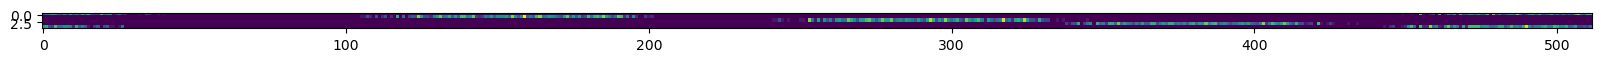

In [3]:
# Load the Matrix_tuning.npz file
npzfile = np.load(f'{folder_path}/simulation_psth.npz')
psth_all = npzfile['psth_all']
stimuli_list = npzfile['stimuli_list']
npzfile.close()

# plt.plot(psth_all[0,:,110])
plt.figure(figsize=(20, 10))
plt.imshow(psth_all[0])
# # Select some neurons (rows) to plot tuning curves for
# neuron_indices = [0, 100, 200, 300, 400]  # Example neurons to plot

# # Plot tuning curves for the selected neurons
# plt.figure(figsize=(4, 3))

# for i in neuron_indices:
#     plt.plot(Matrix_tuning[i, :], label=f'Neuron {i}')

# load = dictionnary['value_of_specific_load']
# # plt.title(f'Neuron Tuning Curves (load={load})')
# plt.title(f'Neuron Tuning Curves (calculated)')
# plt.xlabel('Stimulus')
# plt.ylabel('Firing rate (Hz)')
# plt.legend()
# plt.show()

In [4]:
# Load the .npz file
npzfile = np.load(f'{folder_path}/simulation_results.npz')

# List all the arrays stored in the .npz file
print("Array names:", npzfile.files)

# # Access individual arrays by their names
Matrix_all_results = npzfile['Matrix_all_results']
Matrix_abs_all = npzfile['Matrix_abs_all']
Matrix_angle_all = npzfile['Matrix_angle_all']
Results_ml_spikes = npzfile['Results_ml_spikes']
Drift_from_ml_spikes = npzfile['Drift_from_ml_spikes']
Matrix_initial_input = npzfile['Matrix_initial_input']
# array2 = npzfile['array_name2']
print('Matrix_all_results:',Matrix_all_results)
print('Matrix_abs_all:',Matrix_abs_all)
print('Matrix_angle_all:',Matrix_angle_all)
print('Results_ml_spikes:',Results_ml_spikes)
print('Drift_from_ml_spikes:',Drift_from_ml_spikes)
print('Matrix_initial_input:',Matrix_initial_input)


# plt.imshow(Matrix_all_results)
# Example: print one of the arrays
# print(array1)

# # Close the file after accessing the arrays
npzfile.close()

Array names: ['Matrix_all_results', 'Matrix_abs_all', 'Matrix_angle_all', 'Results_ml_spikes', 'Drift_from_ml_spikes', 'Matrix_initial_input']
Matrix_all_results: [[0.66666667 0.        ]]
Matrix_abs_all: [[ 7.06791123 10.46001379  9.79848013  0.55344955  8.90971724  0.64777346
   2.97896431  0.17071556]]
Matrix_angle_all: [[211.1602823  429.70871163 206.38382907 329.53678203  90.10114461
  397.95857194 439.13456378 247.44621502]]
Results_ml_spikes: [[216. 427. 205.   1.  98. 487. 453. 442.]]
Drift_from_ml_spikes: [[-0.28225246 -0.19634954  0.55223308 -0.92038847  0.06135923 -2.45436926
   2.39301003  1.06765063]]
Matrix_initial_input: [[239. 443. 160.  76.  93.  nan 258.  nan]]


In [5]:
for i in range(512):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27